## Загрузка и исследовательский анализ данных

In [58]:
# !pip install gdown

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gdown

In [59]:
url = 'https://docs.google.com/spreadsheets/d/1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ/edit?usp=sharing&ouid=108853664472972134783&rtpof=true&sd=true'
output_path = 'concat_sample.xlsx'
gdown.download(url, output_path, quiet=False, fuzzy=True)
data = pd.read_excel(output_path)

Downloading...
From: https://drive.google.com/uc?id=1hV8gpJGGW-ox0J-7oRLzamxH0VMSPkoZ
To: C:\Users\potkd\jupyter\macro\concat_sample.xlsx
100%|██████████| 27.5k/27.5k [00:00<00:00, 1.80MB/s]


In [60]:
data = data.iloc[8:, :]
data.reset_index(inplace=True, drop=True)
data.head(10)

,date,key_rate,USD,unemployment,MIACR,SA_M2,inf_exp,key_rate_lag_1,key_rate_lag_3,key_rate_lag_6,...,MIACR_lag_1,MIACR_lag_3,MIACR_lag_6,SA_M2_lag_1,SA_M2_lag_3,SA_M2_lag_6,inf_exp_lag_1,inf_exp_lag_3,inf_exp_lag_6,inflation
0,9.2014,8.0,39.57,0.049,7.95,30566.453628,12.5,8.0,7.5,7.0,...,7.88,8.23,7.85,30330.951084,29826.981754,29966.288667,11.8,11.7,11.65,8.03
1,10.2014,8.0,43.03,0.051,8.24,30736.744857,13.8,8.0,8.0,7.5,...,7.95,8.17,7.87,30566.453628,29965.108154,29375.261508,12.5,11.3,11.50,8.29
2,11.2014,9.5,50.41,0.052,10.21,30687.329065,13.1,8.0,8.0,7.5,...,8.24,7.88,8.21,30736.744857,30330.951084,29824.222698,13.8,11.8,12.70,9.06
3,12.2014,17.0,55.91,0.053,15.47,30753.520091,15.5,9.5,8.0,7.5,...,10.21,7.95,8.23,30687.329065,30566.453628,29826.981754,13.1,12.5,11.70,11.35
4,1.2015,17.0,68.86,0.055,16.96,30813.965221,16.6,17.0,8.0,8.0,...,15.47,8.24,8.17,30753.520091,30736.744857,29965.108154,15.5,13.8,11.30,14.96
5,2.2015,15.0,61.62,0.058,15.12,30916.346879,18.1,17.0,9.5,8.0,...,16.96,10.21,7.88,30813.965221,30687.329065,30330.951084,16.6,13.1,11.80,16.70
6,3.2015,14.0,58.20,0.059,14.90,30986.101967,15.7,15.0,17.0,8.0,...,15.12,15.47,7.95,30916.346879,30753.520091,30566.453628,18.1,15.5,12.50,16.90
7,4.2015,14.0,51.65,0.058,14.36,30823.431605,14.0,14.0,17.0,8.0,...,14.90,16.96,8.24,30986.101967,30813.965221,30736.744857,15.7,16.6,13.80,16.40
8,5.2015,12.5,52.32,0.056,12.83,31566.075251,14.3,14.0,15.0,9.5,...,14.36,15.12,10.21,30823.431605,30916.346879,30687.329065,14.0,18.1,13.10,15.80
9,6.2015,11.5,55.28,0.054,12.50,31674.770675,15.0,12.5,14.0,17.0,...,12.83,14.90,15.47,31566.075251,30986.101967,30753.520091,14.3,15.7,15.50,15.30


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                101 non-null    float64
 1   key_rate            101 non-null    float64
 2   USD                 101 non-null    float64
 3   unemployment        101 non-null    float64
 4   MIACR               101 non-null    float64
 5   SA_M2               101 non-null    float64
 6   inf_exp             101 non-null    float64
 7   key_rate_lag_1      101 non-null    float64
 8   key_rate_lag_3      101 non-null    float64
 9   key_rate_lag_6      101 non-null    float64
 10  USD_lag_1           101 non-null    float64
 11  USD_lag_3           101 non-null    float64
 12  USD_lag_6           101 non-null    float64
 13  unemployment_lag_1  101 non-null    float64
 14  unemployment_lag_3  101 non-null    float64
 15  unemployment_lag_6  101 non-null    float64
 16  MIACR_la

## Применение модели линейной регрессии

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
X = data.iloc[:, 1:25].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [64]:
lin_model = LinearRegression()

In [65]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [66]:
print(f'MSE на тренировочной выборке: {mean_squared_error(lin_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(lin_model.predict(X_test), y_test):.3f}')
text_1 = f'MSE = {mean_squared_error(lin_model.predict(X), y):.3f}'
text_1

MSE на тренировочной выборке: 1.638
MSE на тестовой выборке: 2.987


'MSE = 1.919'

In [67]:
r2_1 = f'R_square = {r2_score(lin_model.predict(X), y):.3f}'

Text(40, 10, 'R_square = 0.904')

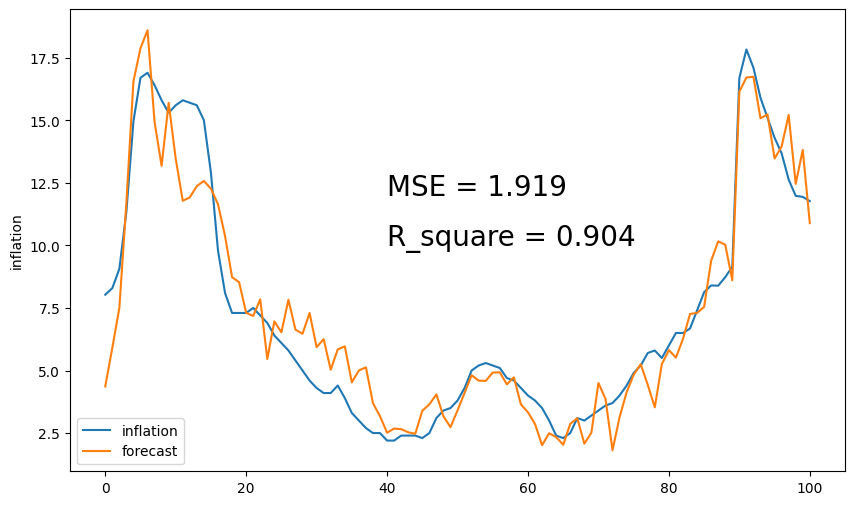

In [69]:
fig, axes = plt.subplots(nrows=1, figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=lin_model.predict(X), label='forecast')
axes.text(40, 12, text_1, fontsize=20)
axes.text(40, 10, r2_1, fontsize=20)

In [70]:
print(lin_model.intercept_ , lin_model.coef_ , lin_model.score (X, y))

-31.014523120290264 [-3.06097110e-01  9.96591560e-02  4.61185704e+01  6.54077356e-01
 -5.22956213e-04  8.30544857e-01 -1.99156534e-01  4.58118245e-01
  3.30443062e-01 -5.08830004e-02 -3.29564121e-02 -1.23702011e-01
 -3.46795647e+01  1.74110979e+02 -5.94133403e+01  5.15338148e-01
  6.64088674e-02  1.20290956e-01 -6.17602078e-04  6.54336703e-04
  9.28225054e-04  2.54682587e-01 -2.91335066e-01 -1.88227444e-01] 0.9119037483644951


## Применение градиентного бустинга на решающих деревьях

In [71]:
from catboost import CatBoostRegressor

In [72]:
boost_model = CatBoostRegressor()

In [73]:
boost_model.fit(X_train, y_train)

Learning rate set to 0.027471
0:	learn: 4.5995137	total: 1.63ms	remaining: 1.63s
1:	learn: 4.5289325	total: 3.11ms	remaining: 1.55s
2:	learn: 4.4663366	total: 4.34ms	remaining: 1.44s
3:	learn: 4.3964297	total: 5.64ms	remaining: 1.4s
4:	learn: 4.3407855	total: 6.73ms	remaining: 1.34s
5:	learn: 4.2753780	total: 7.76ms	remaining: 1.28s
6:	learn: 4.2078639	total: 8.79ms	remaining: 1.25s
7:	learn: 4.1567257	total: 9.71ms	remaining: 1.2s
8:	learn: 4.0891857	total: 10.9ms	remaining: 1.2s
9:	learn: 4.0299612	total: 11.9ms	remaining: 1.18s
10:	learn: 3.9686187	total: 12.8ms	remaining: 1.15s
11:	learn: 3.8993452	total: 13.8ms	remaining: 1.14s
12:	learn: 3.8442503	total: 14.9ms	remaining: 1.13s
13:	learn: 3.7861602	total: 16.3ms	remaining: 1.15s
14:	learn: 3.7380930	total: 17.5ms	remaining: 1.15s
15:	learn: 3.6764493	total: 18.7ms	remaining: 1.15s
16:	learn: 3.6283276	total: 19.9ms	remaining: 1.15s
17:	learn: 3.5743967	total: 21.3ms	remaining: 1.16s
18:	learn: 3.5170437	total: 22.3ms	remaining: 1

In [74]:
print(f'MSE на тренировочной выборке: {mean_squared_error(boost_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(boost_model.predict(X_test), y_test):.3f}')

MSE на тренировочной выборке: 0.000
MSE на тестовой выборке: 0.906


In [76]:
r2_score(boost_model.predict(X), y)

0.9909000440180685

In [77]:
best_model = CatBoostRegressor(n_estimators=2000, depth=4)

In [78]:
best_model.fit(X_train, y_train)

Learning rate set to 0.015636
0:	learn: 4.6315589	total: 918us	remaining: 1.84s
1:	learn: 4.5886134	total: 1.45ms	remaining: 1.45s
2:	learn: 4.5501134	total: 2.23ms	remaining: 1.49s
3:	learn: 4.5104073	total: 2.88ms	remaining: 1.44s
4:	learn: 4.4702103	total: 3.43ms	remaining: 1.37s
5:	learn: 4.4273005	total: 3.97ms	remaining: 1.32s
6:	learn: 4.3937545	total: 4.47ms	remaining: 1.27s
7:	learn: 4.3518480	total: 5.08ms	remaining: 1.27s
8:	learn: 4.3096879	total: 5.61ms	remaining: 1.24s
9:	learn: 4.2772279	total: 6.08ms	remaining: 1.21s
10:	learn: 4.2382316	total: 6.57ms	remaining: 1.19s
11:	learn: 4.2004744	total: 7.09ms	remaining: 1.18s
12:	learn: 4.1704375	total: 7.74ms	remaining: 1.18s
13:	learn: 4.1350851	total: 8.49ms	remaining: 1.2s
14:	learn: 4.0984379	total: 9.3ms	remaining: 1.23s
15:	learn: 4.0601392	total: 10.6ms	remaining: 1.31s
16:	learn: 4.0247322	total: 11.7ms	remaining: 1.36s
17:	learn: 3.9904445	total: 12.6ms	remaining: 1.39s
18:	learn: 3.9577703	total: 13.5ms	remaining: 1

1962:	learn: 0.0406552	total: 953ms	remaining: 18ms
1963:	learn: 0.0406232	total: 954ms	remaining: 17.5ms
1964:	learn: 0.0405714	total: 955ms	remaining: 17ms
1965:	learn: 0.0404996	total: 955ms	remaining: 16.5ms
1966:	learn: 0.0404324	total: 956ms	remaining: 16ms
1967:	learn: 0.0404251	total: 956ms	remaining: 15.5ms
1968:	learn: 0.0403868	total: 957ms	remaining: 15.1ms
1969:	learn: 0.0403715	total: 958ms	remaining: 14.6ms
1970:	learn: 0.0403418	total: 958ms	remaining: 14.1ms
1971:	learn: 0.0402707	total: 959ms	remaining: 13.6ms
1972:	learn: 0.0402555	total: 959ms	remaining: 13.1ms
1973:	learn: 0.0402069	total: 960ms	remaining: 12.6ms
1974:	learn: 0.0401657	total: 960ms	remaining: 12.2ms
1975:	learn: 0.0401546	total: 961ms	remaining: 11.7ms
1976:	learn: 0.0401168	total: 961ms	remaining: 11.2ms
1977:	learn: 0.0400854	total: 962ms	remaining: 10.7ms
1978:	learn: 0.0400446	total: 962ms	remaining: 10.2ms
1979:	learn: 0.0399934	total: 963ms	remaining: 9.72ms
1980:	learn: 0.0399277	total: 963m

In [79]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
print(f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}')
text_2 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_2 = f'R_square = {r2_score(boost_model.predict(X), y):.3f}'

MSE на тренировочной выборке: 0.002
MSE на тестовой выборке: 0.591
MSE = 0.124


Text(46, 9, 'depth = 4')

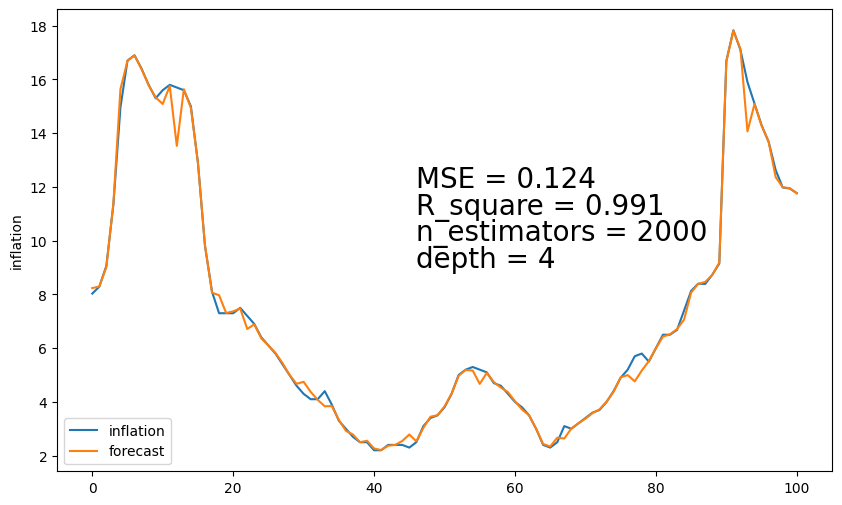

In [80]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(46, 12, text_2, fontsize=20)
axes.text(46, 11, r2_2, fontsize=20)
axes.text(46, 10, 'n_estimators = 2000', fontsize=20)
axes.text(46, 9, 'depth = 4', fontsize=20)

In [81]:
feature_importance = pd.Series(data=best_model.get_feature_importance(), index=data.columns[1:25])

In [82]:
df = pd.DataFrame(data=feature_importance.sort_values(ascending=False).head(10))

In [83]:
df

,0
MIACR,12.171647
MIACR_lag_1,8.053902
inf_exp,7.211194
SA_M2,7.209640
key_rate_lag_1,6.566522
inf_exp_lag_3,6.448470
SA_M2_lag_6,6.216664
key_rate,5.801595
unemployment_lag_1,5.512214
SA_M2_lag_3,5.193848


In [84]:
df[0] = round(df[0], 2)

In [85]:
df.columns=['Влияние, %']

In [86]:
df.index = ['MIACR', 'MIACR в пред. мес.', 'Ожидаемая инфляция', 'Денежная масса M2', 'Ключевая ставка в пред. мес.', 'Ожидаемая инфляция 3 мес. назад', 'Денежная масса 6 мес. назад', 'Ключевая ставка', 'Уровень безработицы в пред. мес.', 'Денежная масса 3 мес. назад']
df

,"Влияние, %"
MIACR,12.17
MIACR в пред. мес.,8.05
Ожидаемая инфляция,7.21
Денежная масса M2,7.21
Ключевая ставка в пред. мес.,6.57
Ожидаемая инфляция 3 мес. назад,6.45
Денежная масса 6 мес. назад,6.22
Ключевая ставка,5.80
Уровень безработицы в пред. мес.,5.51
Денежная масса 3 мес. назад,5.19


[Text(0, 0, '12.17'),
 Text(0, 0, '8.05'),
 Text(0, 0, '7.21'),
 Text(0, 0, '7.21'),
 Text(0, 0, '6.57'),
 Text(0, 0, '6.45'),
 Text(0, 0, '6.22'),
 Text(0, 0, '5.8'),
 Text(0, 0, '5.51'),
 Text(0, 0, '5.19')]

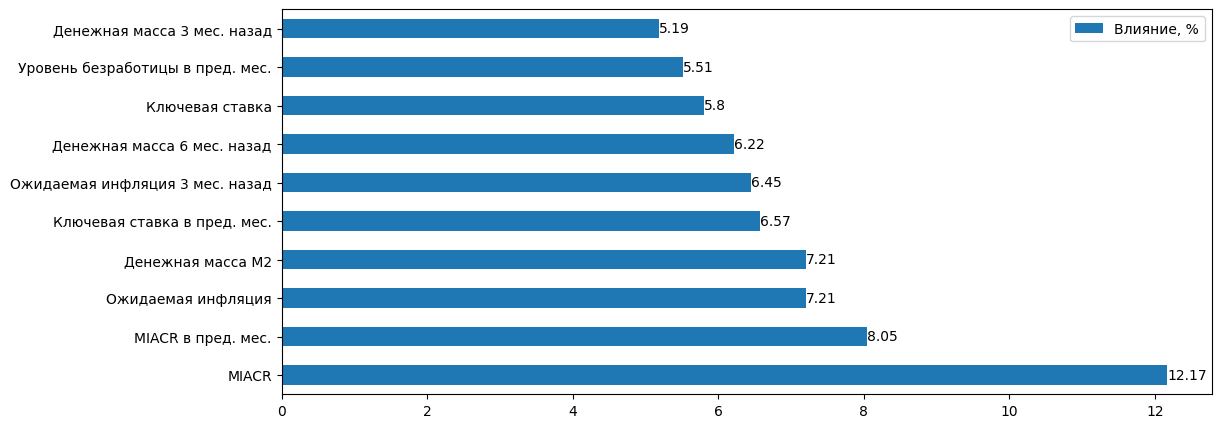

In [87]:
# df.sort_values(by='Влияние, %', ascending=False).head(7).plot(kind='barh', yticks=yticks)
ax = df.plot.barh(figsize=(12, 5))
ax.bar_label(ax.containers[0])

## Оставим наиболее важные факторы

In [88]:
feature_cols = [
    'SA_M2_lag_3',
    'unemployment_lag_1',
    'SA_M2_lag_6', 
    'inf_exp_lag_3',
    'key_rate_lag_1',
    'SA_M2',
    'inf_exp',
    'key_rate',
    'MIACR_lag_1',
    'MIACR', 
]

In [89]:
X = data[feature_cols].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [91]:
best_model = CatBoostRegressor(n_estimators=500, depth=4)

In [92]:
best_model.fit(X_train, y_train)

Learning rate set to 0.048262
0:	learn: 4.5339770	total: 468us	remaining: 234ms
1:	learn: 4.4016726	total: 870us	remaining: 217ms
2:	learn: 4.2757547	total: 1.28ms	remaining: 212ms
3:	learn: 4.1690965	total: 2.32ms	remaining: 287ms
4:	learn: 4.0447626	total: 2.77ms	remaining: 274ms
5:	learn: 3.9306839	total: 3.11ms	remaining: 256ms
6:	learn: 3.8155109	total: 3.44ms	remaining: 242ms
7:	learn: 3.7107187	total: 3.77ms	remaining: 232ms
8:	learn: 3.6104197	total: 4.08ms	remaining: 222ms
9:	learn: 3.5014776	total: 4.38ms	remaining: 215ms
10:	learn: 3.3997731	total: 4.69ms	remaining: 209ms
11:	learn: 3.3128416	total: 5ms	remaining: 203ms
12:	learn: 3.2201442	total: 5.31ms	remaining: 199ms
13:	learn: 3.1572577	total: 5.74ms	remaining: 199ms
14:	learn: 3.0734057	total: 6.06ms	remaining: 196ms
15:	learn: 3.0050416	total: 6.36ms	remaining: 193ms
16:	learn: 2.9233950	total: 6.69ms	remaining: 190ms
17:	learn: 2.8538592	total: 7ms	remaining: 188ms
18:	learn: 2.7793901	total: 7.34ms	remaining: 186ms


In [93]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
text_3 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_3 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'
r2_3

MSE на тренировочной выборке: 0.012
MSE на тестовой выборке: 0.799


'R_square = 0.992'

Text(50, 10, 'R_square = 0.992')

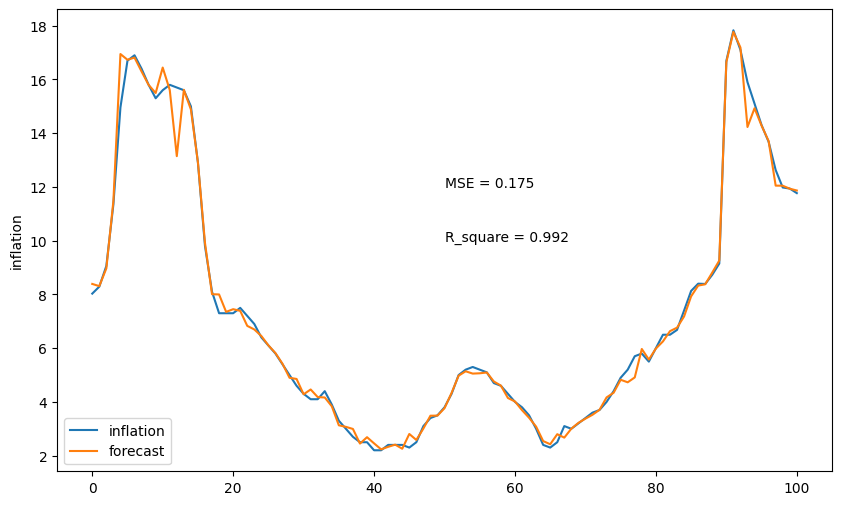

In [94]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(50, 12, text_3)
axes.text(50, 10, r2_3)

In [95]:
feature_cols = [
    'SA_M2_lag_3',
    'inf_exp_lag_3',
    'key_rate_lag_1',
]

In [96]:
X = data[feature_cols].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=39)

In [98]:
best_model = CatBoostRegressor(n_estimators=4000, depth=4)

In [99]:
best_model.fit(X_train, y_train)

Learning rate set to 0.0089
0:	learn: 4.8987941	total: 369us	remaining: 1.48s
1:	learn: 4.8772504	total: 651us	remaining: 1.3s
2:	learn: 4.8526926	total: 876us	remaining: 1.17s
3:	learn: 4.8295703	total: 1.11ms	remaining: 1.11s
4:	learn: 4.8069528	total: 1.33ms	remaining: 1.06s
5:	learn: 4.7853052	total: 1.58ms	remaining: 1.05s
6:	learn: 4.7585868	total: 1.82ms	remaining: 1.04s
7:	learn: 4.7343384	total: 2.06ms	remaining: 1.03s
8:	learn: 4.7131576	total: 2.29ms	remaining: 1.01s
9:	learn: 4.6888257	total: 2.5ms	remaining: 999ms
10:	learn: 4.6637814	total: 2.84ms	remaining: 1.03s
11:	learn: 4.6408712	total: 3.09ms	remaining: 1.02s
12:	learn: 4.6174241	total: 3.34ms	remaining: 1.02s
13:	learn: 4.5966974	total: 3.6ms	remaining: 1.02s
14:	learn: 4.5773070	total: 3.91ms	remaining: 1.04s
15:	learn: 4.5515649	total: 4.15ms	remaining: 1.03s
16:	learn: 4.5238606	total: 4.39ms	remaining: 1.03s
17:	learn: 4.5042224	total: 4.61ms	remaining: 1.02s
18:	learn: 4.4777424	total: 4.86ms	remaining: 1.02s


3142:	learn: 0.1448322	total: 865ms	remaining: 236ms
3143:	learn: 0.1447681	total: 866ms	remaining: 236ms
3144:	learn: 0.1447284	total: 866ms	remaining: 235ms
3145:	learn: 0.1446888	total: 866ms	remaining: 235ms
3146:	learn: 0.1446673	total: 867ms	remaining: 235ms
3147:	learn: 0.1445516	total: 867ms	remaining: 235ms
3148:	learn: 0.1444880	total: 867ms	remaining: 234ms
3149:	learn: 0.1444603	total: 868ms	remaining: 234ms
3150:	learn: 0.1444389	total: 868ms	remaining: 234ms
3151:	learn: 0.1443501	total: 868ms	remaining: 234ms
3152:	learn: 0.1442870	total: 869ms	remaining: 233ms
3153:	learn: 0.1442595	total: 869ms	remaining: 233ms
3154:	learn: 0.1442204	total: 869ms	remaining: 233ms
3155:	learn: 0.1441058	total: 870ms	remaining: 233ms
3156:	learn: 0.1440544	total: 870ms	remaining: 232ms
3157:	learn: 0.1440156	total: 870ms	remaining: 232ms
3158:	learn: 0.1439943	total: 871ms	remaining: 232ms
3159:	learn: 0.1439080	total: 871ms	remaining: 231ms
3160:	learn: 0.1438456	total: 871ms	remaining:

3672:	learn: 0.1187596	total: 1.01s	remaining: 89.6ms
3673:	learn: 0.1187107	total: 1.01s	remaining: 89.4ms
3674:	learn: 0.1186893	total: 1.01s	remaining: 89.1ms
3675:	learn: 0.1186794	total: 1.01s	remaining: 88.8ms
3676:	learn: 0.1186689	total: 1.01s	remaining: 88.6ms
3677:	learn: 0.1186585	total: 1.01s	remaining: 88.3ms
3678:	learn: 0.1186151	total: 1.01s	remaining: 88ms
3679:	learn: 0.1185883	total: 1.01s	remaining: 87.7ms
3680:	learn: 0.1185671	total: 1.01s	remaining: 87.5ms
3681:	learn: 0.1185572	total: 1.01s	remaining: 87.2ms
3682:	learn: 0.1184837	total: 1.01s	remaining: 86.9ms
3683:	learn: 0.1184571	total: 1.01s	remaining: 86.7ms
3684:	learn: 0.1183969	total: 1.01s	remaining: 86.4ms
3685:	learn: 0.1183758	total: 1.01s	remaining: 86.1ms
3686:	learn: 0.1183660	total: 1.01s	remaining: 85.8ms
3687:	learn: 0.1183297	total: 1.01s	remaining: 85.6ms
3688:	learn: 0.1183088	total: 1.01s	remaining: 85.3ms
3689:	learn: 0.1182733	total: 1.01s	remaining: 85ms
3690:	learn: 0.1182635	total: 1.

In [100]:
print(f'MSE на тренировочной выборке: {mean_squared_error(best_model.predict(X_train), y_train):.3f}')
print(f'MSE на тестовой выборке: {mean_squared_error(best_model.predict(X_test), y_test):.3f}')
text_4 = f'MSE = {mean_squared_error(best_model.predict(X), y):.3f}'
r2_4 = f'R_square = {r2_score(best_model.predict(X), y):.3f}'
text_4, r2_4

MSE на тренировочной выборке: 0.012
MSE на тестовой выборке: 0.935


('MSE = 0.204', 'R_square = 0.990')

Text(48, 9, 'depth=4')

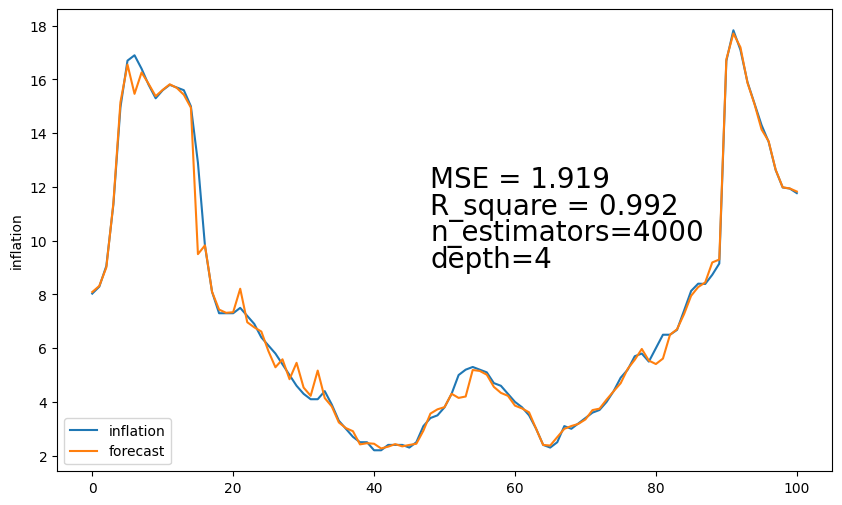

In [101]:
fig, axes = plt.subplots(figsize=(10, 6))
x = np.arange(0, 101)
sns.lineplot(data=data, x=x, y='inflation', label='inflation')
sns.lineplot(data=data, x=x, y=best_model.predict(X), label='forecast')
axes.text(48, 12, text_1, fontsize=20)
axes.text(48, 11, r2, fontsize=20)
axes.text(48, 10, 'n_estimators=4000', fontsize=20)
axes.text(48, 9, 'depth=4', fontsize=20)